In [140]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import random
#Importing the necessary libraries

In [2]:
X=pd.read_csv("../data/Genes/data.csv")

In [141]:
#Reading the Genome data

In [3]:
y=pd.read_csv("../data/Genes/labels.csv")

In [142]:
#Reading the Genome labels

In [4]:
X.shape

(801, 20532)

In [5]:
X.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [ ]:
#There is a unwanted column in both X and y
# Removing the column

In [6]:
X=X.iloc[:,1:]

In [7]:
y=y.iloc[:,1:2]

In [143]:
y.head()

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA


In [9]:
np.flatnonzero(np.sum(pd.isnull(X))>0)
#Checking for null values

array([], dtype=int64)

In [10]:
np.flatnonzero(X.std()==0).shape
#Checking for zero column vectors 

(267,)

In [145]:
#We find 267 column vectors that do not contribute anything so we go ahead and remove them

In [11]:
X=X.drop(X.std()[X.std()==0].index.values,axis=1)

In [12]:
X.shape

(801, 20264)

#### Preprocessing

In [14]:
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [146]:
# We use the sklearn's pipeline function and create a preprocessor which uses robust scaling and fills in any null values

In [15]:
numeric_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='mean'))
      ,('scaler', RobustScaler())
])

In [16]:
categorical_transformer = Pipeline(steps=[
       ('imputer', SimpleImputer(strategy='constant'))
      ,('encoder', OrdinalEncoder())
])

In [17]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

In [18]:
categorical_features = X.select_dtypes(include=['object']).columns

In [19]:
preprocessor = ColumnTransformer(
   transformers=[
    ('numeric', numeric_transformer, numeric_features)
]) 

In [147]:
#fitting the data to the created preprocessor

In [20]:
X_pre=preprocessor.fit_transform(X)

In [21]:
X_pre.shape

(801, 20264)

In [ ]:
# we make sure that labels are factorise before we pass them to calculate the validity of the clusters

In [34]:
y_fact=pd.factorize(np.ravel(y))[0]

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [40]:
range_n_clusters = [3, 4, 5, 6, 7, 8]

#### Experiment4: bAse model

In [95]:
clustdict={}
amis_list=[]
fowlkesscore_list=[]
sil_list=[]
k_list=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pre)
    fowlkesscore = metrics.fowlkes_mallows_score(y_fact, cluster_labels )
    amis=metrics.adjusted_mutual_info_score(y_fact, cluster_labels )
    sil=metrics.silhouette_score(X_pre, cluster_labels )
    amis_list.append(amis)
    fowlkesscore_list.append(fowlkesscore)
    sil_list.append(sil)
    k_list.append(n_clusters)
    print("Value of k: %d" %n_clusters)
    print("fowlkes_mallows_score: %0.3f" % fowlkesscore)
    print( "Adjusted Mutual Information: %0.3f"% amis)
    print( "silhouette Score: %0.3f"% sil)
    print("__________________________________________________")
clustdict["amis"]=amis_list
clustdict["fowlkesscore"]=fowlkesscore_list
clustdict["k"]=k_list
clustdict["sil"]=sil_list

    

Value of k: 3
fowlkes_mallows_score: 0.707
Adjusted Mutual Information: 0.734
silhouette Score: 0.108
__________________________________________________
Value of k: 4
fowlkes_mallows_score: 0.791
Adjusted Mutual Information: 0.838
silhouette Score: 0.137
__________________________________________________
Value of k: 5
fowlkes_mallows_score: 0.984
Adjusted Mutual Information: 0.970
silhouette Score: 0.155
__________________________________________________
Value of k: 6
fowlkes_mallows_score: 0.890
Adjusted Mutual Information: 0.909
silhouette Score: 0.154
__________________________________________________
Value of k: 7
fowlkes_mallows_score: 0.860
Adjusted Mutual Information: 0.875
silhouette Score: 0.153
__________________________________________________
Value of k: 8
fowlkes_mallows_score: 0.773
Adjusted Mutual Information: 0.832
silhouette Score: 0.127
__________________________________________________


#### Experiment 1 : Applying pca and then applying the k means method on it and  then calculating the metrics

In [98]:
pca_dict={}

for i in [530,373,262]:
    print("-----------------------------")
    print("N_components: %0.2f" % i)
    print("-----------------------------")
    pca = PCA(n_components=i)
    X_pca=pca.fit_transform(X_pre)
    clustdict={}
    amis_list=[]
    fowlkesscore_list=[]
    k_list=[]
    sil_list=[]
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_pca)
        fowlkesscore = metrics.fowlkes_mallows_score(y_fact, cluster_labels )
        amis=metrics.adjusted_mutual_info_score(y_fact, cluster_labels )
        sil=metrics.silhouette_score(X_pca, cluster_labels )
        amis_list.append(amis)
        fowlkesscore_list.append(fowlkesscore)
        k_list.append(n_clusters)
        sil_list.append(sil)
        clustdict["amis"]=amis_list
        clustdict["fowlkesscore"]=fowlkesscore_list
        clustdict["k"]=k_list
        clustdict["sil"]=sil_list
        print("Value of k: %d" %n_clusters)
        print("fowlkes_mallows_score: %0.3f" % fowlkesscore)
        print( "Adjusted Mutual Information: %0.3f"% amis)
        print( "silhouette Score: %0.3f"% sil)
        print("__________________________________________________")
    pca_dict[i]=clustdict
    

-----------------------------
N_components: 530.00
-----------------------------
Value of k: 3
fowlkes_mallows_score: 0.707
Adjusted Mutual Information: 0.734
silhouette Score: 0.114
__________________________________________________
Value of k: 4
fowlkes_mallows_score: 0.791
Adjusted Mutual Information: 0.838
silhouette Score: 0.145
__________________________________________________
Value of k: 5
fowlkes_mallows_score: 0.990
Adjusted Mutual Information: 0.980
silhouette Score: 0.165
__________________________________________________
Value of k: 6
fowlkes_mallows_score: 0.880
Adjusted Mutual Information: 0.908
silhouette Score: 0.165
__________________________________________________
Value of k: 7
fowlkes_mallows_score: 0.860
Adjusted Mutual Information: 0.872
silhouette Score: 0.164
__________________________________________________
Value of k: 8
fowlkes_mallows_score: 0.798
Adjusted Mutual Information: 0.838
silhouette Score: 0.136
__________________________________________________
-

#### Experiment 2 : Applying kernel-pca and then applying the k means method on it and  then calculating the metrics

In [102]:
kpca_dict={}

for i in [530,373,262]:
    print("-----------------------------")
    print("N_components: %0.2f" % i)
    print("-----------------------------")
    kpca = KernelPCA(n_components=i,kernel="rbf")
    Xk_pca=kpca.fit_transform(X_pre)
    clustdict={}
    amis_list=[]
    fowlkesscore_list=[]
    k_list=[]
    sil_list=[]
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(Xk_pca)
        fowlkesscore = metrics.fowlkes_mallows_score(y_fact, cluster_labels )
        amis=metrics.adjusted_mutual_info_score(y_fact, cluster_labels )
        sil=metrics.silhouette_score(Xk_pca, cluster_labels )
        amis_list.append(amis)
        fowlkesscore_list.append(fowlkesscore)
        k_list.append(n_clusters)
        sil_list.append(sil)
        clustdict["amis"]=amis_list
        clustdict["fowlkesscore"]=fowlkesscore_list
        clustdict["k"]=k_list
        clustdict["sil"]=sil_list
        print("Value of k: %d" %n_clusters)
        print("fowlkes_mallows_score: %0.3f" % fowlkesscore)
        print( "Adjusted Mutual Information: %0.3f"% amis)
        print( "silhouette Score: %0.3f"% sil)
        print("__________________________________________________")
    kpca_dict[i]=clustdict

-----------------------------
N_components: 530.00
-----------------------------
Value of k: 3
fowlkes_mallows_score: 0.680
Adjusted Mutual Information: 0.671
silhouette Score: 0.069
__________________________________________________
Value of k: 4
fowlkes_mallows_score: 0.763
Adjusted Mutual Information: 0.791
silhouette Score: 0.088
__________________________________________________
Value of k: 5
fowlkes_mallows_score: 0.782
Adjusted Mutual Information: 0.814
silhouette Score: 0.099
__________________________________________________
Value of k: 6
fowlkes_mallows_score: 0.789
Adjusted Mutual Information: 0.829
silhouette Score: 0.100
__________________________________________________
Value of k: 7
fowlkes_mallows_score: 0.771
Adjusted Mutual Information: 0.786
silhouette Score: 0.105
__________________________________________________
Value of k: 8
fowlkes_mallows_score: 0.753
Adjusted Mutual Information: 0.788
silhouette Score: 0.079
__________________________________________________
-

#### Experiment 3 : Applying anova F_selec and then applying the k means method on it and  then calculating the metrics

In [103]:
anova_dict={}

for i in [530,373,262]:
    print("-----------------------------")
    print("N_components: %0.2f" % i)
    print("-----------------------------")
    anova = SelectKBest(f_classif,k=i)
    X_anova=anova.fit_transform(X_pre,np.ravel(y))
    clustdict={}
    amis_list=[]
    fowlkesscore_list=[]
    k_list=[]
    sil_list=[]
    for n_clusters in range_n_clusters:
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X_anova)
        fowlkesscore = metrics.fowlkes_mallows_score(y_fact, cluster_labels )
        amis=metrics.adjusted_mutual_info_score(y_fact, cluster_labels )
        sil=metrics.silhouette_score(X_anova, cluster_labels )
        amis_list.append(amis)
        fowlkesscore_list.append(fowlkesscore)
        k_list.append(n_clusters)
        sil_list.append(sil)
        clustdict["amis"]=amis_list
        clustdict["fowlkesscore"]=fowlkesscore_list
        clustdict["k"]=k_list
        clustdict["sil"]=sil_list
        print("Value of k: %d" %n_clusters)
        print("fowlkes_mallows_score: %0.3f" % fowlkesscore)
        print( "Adjusted Mutual Information: %0.3f"% amis)
        print( "silhouette Score: %0.3f"% sil)
        print("__________________________________________________")
   
    anova_dict[i]=clustdict

-----------------------------
N_components: 530.00
-----------------------------
Value of k: 3
fowlkes_mallows_score: 0.702
Adjusted Mutual Information: 0.724
silhouette Score: 0.407
__________________________________________________
Value of k: 4
fowlkes_mallows_score: 0.795
Adjusted Mutual Information: 0.849
silhouette Score: 0.477
__________________________________________________
Value of k: 5
fowlkes_mallows_score: 0.964
Adjusted Mutual Information: 0.951
silhouette Score: 0.529
__________________________________________________
Value of k: 6
fowlkes_mallows_score: 0.939
Adjusted Mutual Information: 0.922
silhouette Score: 0.482
__________________________________________________
Value of k: 7
fowlkes_mallows_score: 0.910
Adjusted Mutual Information: 0.890
silhouette Score: 0.446
__________________________________________________
Value of k: 8
fowlkes_mallows_score: 0.899
Adjusted Mutual Information: 0.871
silhouette Score: 0.410
__________________________________________________
-

#### Plotting results of the above experiments

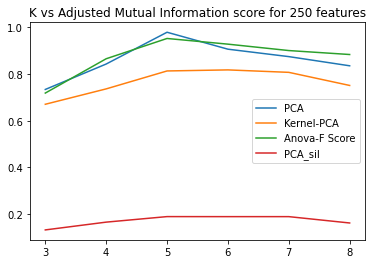

In [101]:
plt.plot(pca_dict[262]["k"],pca_dict[262]["amis"],label="PCA")
plt.plot(kpca_dict[262]["k"],kpca_dict[262]["amis"],label="Kernel-PCA")
plt.plot(anova_dict[262]["k"],anova_dict[262]["amis"],label="Anova-F Score")
plt.title("K vs Adjusted Mutual Information score for 250 features")
plt.legend()
plt.savefig("250")

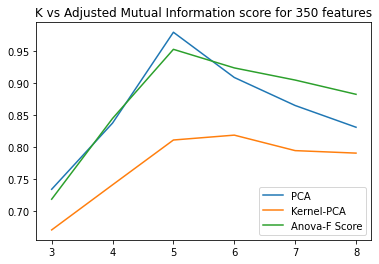

In [139]:
plt.plot(pca_dict[373]["k"],pca_dict[373]["amis"],label="PCA")
plt.plot(kpca_dict[373]["k"],kpca_dict[373]["amis"],label="Kernel-PCA")
plt.plot(anova_dict[373]["k"],anova_dict[373]["amis"],label="Anova-F Score")
plt.title("K vs Adjusted Mutual Information score for 350 features")
plt.legend()
plt.savefig("amis350")

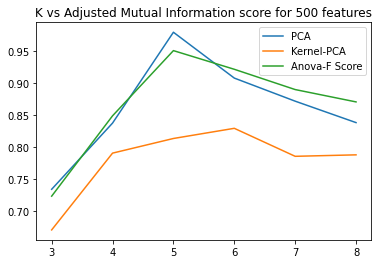

In [138]:
plt.plot(pca_dict[530]["k"],pca_dict[530]["amis"],label="PCA")
plt.plot(kpca_dict[530]["k"],kpca_dict[530]["amis"],label="Kernel-PCA")
plt.plot(anova_dict[530]["k"],anova_dict[530]["amis"],label="Anova-F Score")
plt.title("K vs Adjusted Mutual Information score for 500 features")
plt.legend()
plt.savefig("amis500")

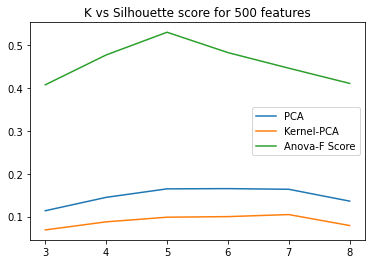

In [137]:
plt.plot(pca_dict[530]["k"],pca_dict[530]["sil"],label="PCA")
plt.plot(kpca_dict[530]["k"],kpca_dict[530]["sil"],label="Kernel-PCA")
plt.plot(anova_dict[530]["k"],anova_dict[530]["sil"],label="Anova-F Score")
plt.title("K vs Silhouette score for 500 features")
plt.legend()
plt.savefig("sil500")

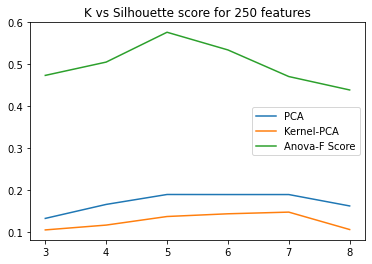

In [136]:
plt.plot(pca_dict[262]["k"],pca_dict[262]["sil"],label="PCA")
plt.plot(kpca_dict[262]["k"],kpca_dict[262]["sil"],label="Kernel-PCA")
plt.plot(anova_dict[262]["k"],anova_dict[262]["sil"],label="Anova-F Score")
plt.title("K vs Silhouette score for 250 features")
plt.legend()
plt.savefig("sil250")